# D50 Calclation

In [2]:
import pandas as pd
import ssd50 as ss
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df= pd.read_excel('full_cleansed_data.xlsx',header=0,index_col=0,usecols='A:N')
#df=df.drop('Unnamed: 0',axis=1)
#df=df.set_index('minute')
df.head()

,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_BP2,Mill_BP3,Mill_BP4,Mill_power,Sump_level,Cyc_density,Cyc_pressure
minute,,,,,,,,,,,,,
0.0,102.936172,17.707464,15.150931,534.184387,56.929588,6100.553711,6034.728516,5911.115234,5186.361816,2156,46.984039,54.155647,11.247608
2.0,103.558838,16.584286,15.145869,521.392517,33.607075,6136.253418,6022.999023,5930.505371,5255.145996,2155,42.007778,54.143642,11.246670
4.0,104.628387,16.629253,15.140807,521.360291,36.615730,6100.098145,6029.115723,5905.294922,5184.526855,2160,38.503761,54.230686,11.245730
6.0,103.977753,16.137365,15.135746,523.875610,37.966499,6114.615723,6016.797852,5844.339844,5269.082520,2167,32.937874,54.317730,11.244792
8.0,102.229675,15.267424,15.160000,527.401794,52.571075,6083.479004,6033.093262,5865.364746,5231.327148,2164,39.301735,54.360500,11.243853


In [78]:
df1= pd.read_excel('Ball mill APC (1 min) - 1-4.xlsx',header=7,usecols='A:N',nrows=59040)

In [79]:
df2= pd.read_excel('Ball mill APC (1 min) - 2-4.xlsx',header=7,usecols='A:N',nrows=57600)

In [80]:
df3= pd.read_excel('Ball mill APC (1 min) - 3-4.xlsx',header=7,usecols='A:N',nrows=57540)

In [81]:
df4= pd.read_excel('Ball mill APC (1 min) - 4-4.xlsx',header=7,usecols='A:N',nrows=57601)

In [83]:
df1.rename(columns={"Unnamed: 0": "time"},inplace=True)
df2.rename(columns={"Unnamed: 0": "time"},inplace=True)
df3.rename(columns={"Unnamed: 0": "time"},inplace=True)
df4.rename(columns={"Unnamed: 0": "time"},inplace=True)
# display(df1.head(1))
# display(df1.tail(1))
# display(df2.head(1))
# display(df2.iloc[-1])
# display(df3.head(1))
# display(df3.tail())
# display(df4.head(1))
# len(MDF)
# mdf=MDF.reset_index()
# mdf=mdf.drop('index',axis=1)
# mdf.tail()
# mdf.rename(columns={'Unnamed: 0': 'time'},inplace=True)
# MDF=pd.concat((df1,df2,df3,df4))
#save as excel...


In [24]:
df1= pd.read_excel('1_minute_mother_data.xlsx',header=0,index_col=0)

In [27]:
df1.reset_index(inplace=True)

In [28]:
df1=df1.drop('time',axis=1)
#df.head()

In [29]:
df=df1.clip(0.01)

In [30]:
df['BP_av']= 0.25* ( df['Mill_BP1']+df['Mill_BP2']+df['Mill_BP3']+df['Mill_BP4'] )
df['t_shift'] = df['tph'].shift(5) #10 minute time delay
df=df.iloc[5:]

In [31]:
df['D50C']=df.apply(lambda row: ss.D50_meas_vol(row['Cyc_flow'],row['t_shift'],row['Cyc_pressure']),axis=1)  #row['Pump_speed']

In [34]:
# df.head()

In [35]:
#df=df.set_index('minute')
df=df.drop('t_shift',axis=1)
df=df.drop('Mill_BP2',axis=1)
df=df.drop('Mill_BP3',axis=1)
df=df.drop('Mill_BP4',axis=1)

In [37]:
#df.head()

In [38]:
df0=df.dropna()

In [41]:
len(df)-len(df0)

2406

In [49]:
df0.reset_index(inplace=True)

In [48]:
df0=df0.rename({'level_0':'level_1'},axis=1)
df0.reset_index(inplace=True)

In [51]:
df0=df0.drop('index',axis=1)

In [84]:
df0.to_excel('cal_clean_1min.xlsx',header=True,index=True)

In [65]:
df0['diff']= df0['level_1'] - df0['level_0']

In [74]:
#df0.head()
tot=5
totsum=0
gap=6
gapsum=0
for i in df0['level_0']:
    if (df0['level_1'].iloc[i] - df0['level_0'].iloc[i]) > tot:
        totsum+=1
        tot+= df0['level_1'].iloc[i] - df0['level_0'].iloc[i] - 5
        print(df0['level_0'].iloc[i])
        if (df0['level_1'].iloc[i] - df0['level_0'].iloc[i]) > (tot+1):
            gapsum+=1 #print(df0.iloc[i])
            #break
        else: 
            continue
    else:
        continue

1821
1825
2008
74869
184830
185757
185801


In [78]:
df0=df0.drop('level_0',axis=1)
df0=df0.drop('diff',axis=1)
df0=df0.drop('level_1',axis=1)

In [79]:
#1821
df00=df0.iloc[0:1820]
df01=df0.iloc[2009:74868]
df02=df0.iloc[74869:184829]
df03=df0.iloc[185802:]
#df0.iloc[1820:1826]

In [81]:
len(df0)

229370

In [82]:
df00.to_excel('CC_0:1819.xlsx',header=True,index=True)
df01.to_excel('CC_2009:74867.xlsx',header=True,index=True)
df02.to_excel('CC_74869:184828.xlsx',header=True,index=True)
df03.to_excel('CC_185802:229370.xlsx',header=True,index=True)

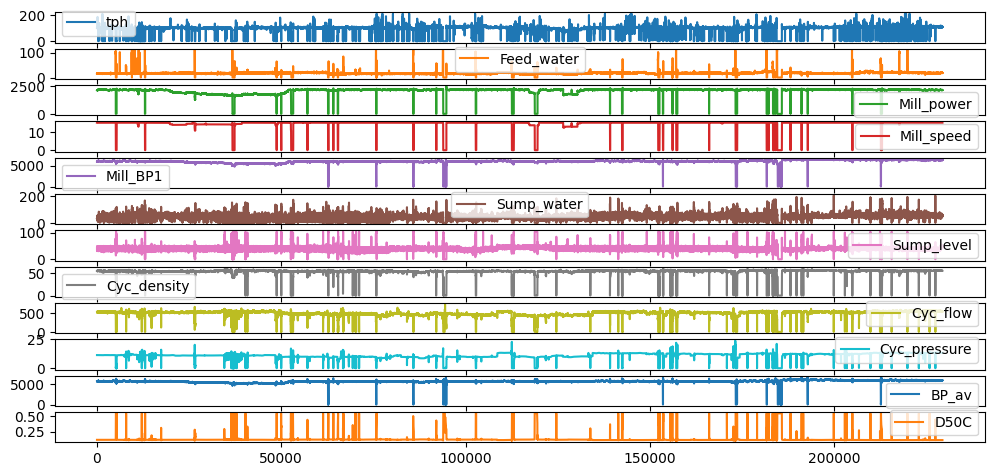

In [85]:
df0.plot(kind='line',subplots=True,layout=(15,1),figsize=(12,7))
plt.show();

In [33]:
#df=df.rename(columns={'Pump_speed' : 'Cyc_vol'})

In [55]:
df.to_excel('D50_Full_01.xlsx',header=True,index=True)